# Bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Perceptron simples - Implementação

## Perceptron didático: mostra as contas, número de épocas, pesos e se acertou tudo

In [2]:
# Função de ativação
def f_ativacao(v):
    return 1 if np.sum(v) >= 0 else 0

# Implementação Perceptron simples
def meu_neuronio_didatico(bias, pesos, tx_aprendizado, dataset, epocas_max = 100):
    # O neurônio didático mostra as contas que faz para que eu possa acompanhar o desenvolvimento dos cálculos.
    acertou_tudo = ''
    epocas = 1
    erro = True
    
    while erro == True and epocas <= epocas_max:
        acertos = 0
        erro = False
        print(f'\n\nÉPOCA {epocas}')
        for amostra in dataset:
            x = np.array([bias, amostra[0], amostra[1]])
            res_esp = amostra[2]
            print(f'pesos*x = {pesos} * {x}')
            v = pesos*x  # Calcular o sinal do neurônio
            print(f'v = {np.sum(v)}')
            res_calc = f_ativacao(v)   # Calcular o sinal da saída do neurônio
            print(f'res_calc = {res_calc}')
    
            print(f'esperado: {res_esp}')
            if res_calc != res_esp:
                pesos = pesos + tx_aprendizado*(res_esp - res_calc)*x
                print(f'pesos novo = {pesos}')
                erro = True
            else:
                print('✅')
                acertos += 1
            
            print()

        epocas += 1

    acertou_tudo += 'sim' if acertos == len(dataset) else 'não'
    return epocas-1, pesos, acertou_tudo

## Perceptron normal: mostra só o número de épocas, pesos e se acertou tudo

In [3]:
# Implementação Perceptron simples
def meu_neuronio(bias, pesos, tx_aprendizado, dataset, epocas_max = 100):
    # Já este neurônio não mostra nada das contas, para não poluir o notebook
    acertou_tudo = ''
    epocas = 1
    erro = True
    
    while erro == True and epocas <= epocas_max:
        acertos = 0
        erro = False
        for amostra in dataset:
            x = np.array([bias, amostra[0], amostra[1]])
            res_esp = amostra[2]
            v = pesos*x  # Calcular o sinal do neurônio
            res_calc = f_ativacao(v)   # Calcular o sinal da saída do neurônio
    
            if res_calc != res_esp:
                pesos = pesos + tx_aprendizado*(res_esp - res_calc)*x
                erro = True
            else:
                acertos += 1

        epocas += 1

    acertou_tudo += 'sim' if acertos == len(dataset) else 'não'
    return epocas-1, pesos, acertou_tudo

### Testando com exemplo dado em aula

In [4]:
dataset = [[2., 2., 1.], [4., 4., 0.]]

pesos = np.array([-.5441, .5562, .4074])
bias = -1
tx_aprendizado = .1

epocas, pesos, acertou_tudo = meu_neuronio_didatico(bias, pesos, tx_aprendizado, dataset, epocas_max = 100)

print(f'Épocas: {epocas}')
print(f'Pesos: {pesos}')
print(f'Acertou tudo?: {acertou_tudo}')



ÉPOCA 1
pesos*x = [-0.5441  0.5562  0.4074] * [-1.  2.  2.]
v = 2.4713000000000003
res_calc = 1
esperado: 1.0
✅

pesos*x = [-0.5441  0.5562  0.4074] * [-1.  4.  4.]
v = 4.3985
res_calc = 1
esperado: 0.0
pesos novo = [-0.4441  0.1562  0.0074]



ÉPOCA 2
pesos*x = [-0.4441  0.1562  0.0074] * [-1.  2.  2.]
v = 0.7713
res_calc = 1
esperado: 1.0
✅

pesos*x = [-0.4441  0.1562  0.0074] * [-1.  4.  4.]
v = 1.0985
res_calc = 1
esperado: 0.0
pesos novo = [-0.3441 -0.2438 -0.3926]



ÉPOCA 3
pesos*x = [-0.3441 -0.2438 -0.3926] * [-1.  2.  2.]
v = -0.9287000000000001
res_calc = 0
esperado: 1.0
pesos novo = [-0.4441 -0.0438 -0.1926]

pesos*x = [-0.4441 -0.0438 -0.1926] * [-1.  4.  4.]
v = -0.5015000000000002
res_calc = 0
esperado: 0.0
✅



ÉPOCA 4
pesos*x = [-0.4441 -0.0438 -0.1926] * [-1.  2.  2.]
v = -0.02870000000000006
res_calc = 0
esperado: 1.0
pesos novo = [-0.5441  0.1562  0.0074]

pesos*x = [-0.5441  0.1562  0.0074] * [-1.  4.  4.]
v = 1.1985
res_calc = 1
esperado: 0.0
pesos novo = [-0.44

## a) Dataset OR

In [5]:
dataset = pd.read_csv('../datasets/or.csv')
dataset = dataset[['X1', 'X2', 'D']]
dataset

,X1,X2,D
0,0,0,-1
1,0,1,1
2,1,0,1
3,1,1,1


é necessário trocar os valores -1 por 0, pois o perceptron apenas pode retornar 0 ou 1

In [6]:
dataset['D'] = dataset['D'].map({1: 1, -1: 0})
dataset

,X1,X2,D
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


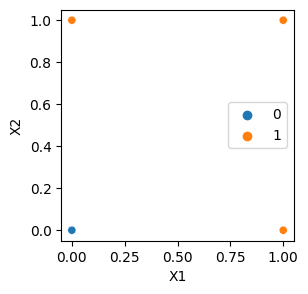

In [7]:
fig, ax = plt.subplots(figsize = (3, 3))
sns.scatterplot(data = dataset, x = 'X1', y = 'X2', hue = 'D', palette = 'tab10', ax = ax)
ax.legend();

In [8]:
pesos = np.array([.5, .5, .5])
bias = 1
tx_aprendizado = .1
epocas_max = 100

epocas, pesos, acertou_tudo = meu_neuronio(bias, pesos, tx_aprendizado, dataset = dataset.values)

print(50*'=')
print(f'Épocas: {epocas}')
print(f'Pesos: {pesos}')
print(f'Acertou tudo?: {acertou_tudo}')

Épocas: 7
Pesos: [-0.1  0.5  0.5]
Acertou tudo?: sim


In [9]:
w0, w1, w2 = pesos[0], pesos[1], pesos[2]

intercept = -w0/w2
slope = -w2/w1

xs = np.arange(0, 2)
ys = slope*xs + intercept

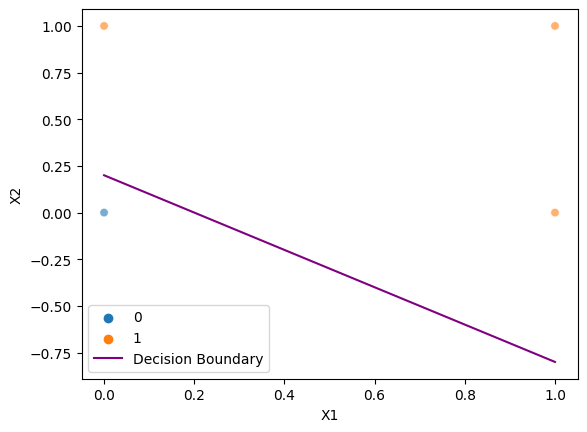

In [10]:
sns.scatterplot(data = dataset, x = 'X1', y = 'X2', hue = 'D', alpha = .6)

plt.plot(xs, ys, color = 'purple', label = 'Decision Boundary')
plt.legend()
plt.show()

### Testando diferentes taxas de aprendizado (dataset OR)

In [11]:
pesos = np.array([.5, .5, .5])
bias = 1
valores = {}

for tx_aprendizado in [.001, .01, .1, .3, .5, 1]:
    acertou_tudo = 'nao'
    print(f'TAXA DE APRENDIZADO: {tx_aprendizado}')
    epocas, pesos, acertou_tudo = meu_neuronio(bias, pesos, tx_aprendizado = tx_aprendizado, dataset = dataset.values, epocas_max = 100)
    
    print(50*'=')
    print(f'Épocas: {epocas}')
    print(f'Pesos: {pesos}')
    print(f'Épocas: {acertou_tudo}')
    
    valores[tx_aprendizado] = [epocas, pesos, acertou_tudo]

TAXA DE APRENDIZADO: 0.001
Épocas: 100
Pesos: [0.4 0.5 0.5]
Épocas: não
TAXA DE APRENDIZADO: 0.01
Épocas: 41
Pesos: [-3.08780779e-16  5.00000000e-01  5.00000000e-01]
Épocas: sim
TAXA DE APRENDIZADO: 0.1
Épocas: 1
Pesos: [-3.08780779e-16  5.00000000e-01  5.00000000e-01]
Épocas: sim
TAXA DE APRENDIZADO: 0.3
Épocas: 1
Pesos: [-3.08780779e-16  5.00000000e-01  5.00000000e-01]
Épocas: sim
TAXA DE APRENDIZADO: 0.5
Épocas: 1
Pesos: [-3.08780779e-16  5.00000000e-01  5.00000000e-01]
Épocas: sim
TAXA DE APRENDIZADO: 1
Épocas: 1
Pesos: [-3.08780779e-16  5.00000000e-01  5.00000000e-01]
Épocas: sim


Curioso que o modelo com menor taxa de aprendizado foi o único que não conseguiu aprender em 100 épocas

## b) Dataset AND 

In [12]:
dataset = pd.read_csv('../datasets/and.csv')
dataset['D'] = dataset['D'].map({1 : 1, -1 : 0})
dataset = dataset.drop(['Bias'], axis = 1)

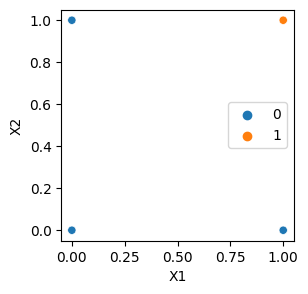

In [13]:
fig, ax = plt.subplots(figsize = (3, 3))
sns.scatterplot(data = dataset, x = 'X1', y = 'X2', hue = 'D', palette = 'tab10', ax = ax)
ax.legend();

In [14]:
pesos = np.array([.5, .5, .5])
bias = 1
tx_aprendizado = .1
epocas_max = 100

epocas, pesos, acertou_tudo = meu_neuronio(bias, pesos, tx_aprendizado, dataset = dataset.values)

print(50*'=')
print(f'Épocas: {epocas}')
print(f'Pesos: {pesos}')
print(f'Acertou tudo?: {acertou_tudo}')

Épocas: 4
Pesos: [-0.3  0.2  0.2]
Acertou tudo?: sim


In [15]:
w0, w1, w2 = pesos[0], pesos[1], pesos[2]

intercept = -w0/w2
slope = -w2/w1

xs = np.arange(0, 2)
ys = slope*xs + intercept

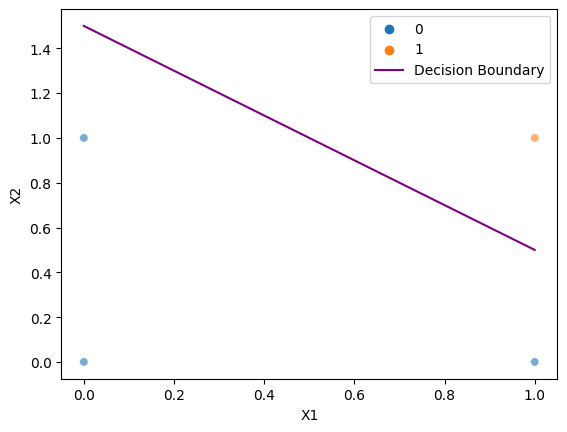

In [16]:
sns.scatterplot(data = dataset, x = 'X1', y = 'X2', hue = 'D', alpha = .6)

plt.plot(xs, ys, color = 'purple', label = 'Decision Boundary')
plt.legend()
plt.show()

## c) Dataset XOR

In [17]:
dataset = pd.read_csv('../datasets/xor.csv')
dataset['D'] = dataset['D'].map({1 : 1, -1 : 0})
dataset = dataset.drop(['Bias'], axis = 1)
dataset

,X1,X2,D
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


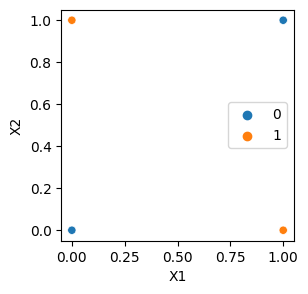

In [18]:
fig, ax = plt.subplots(figsize = (3, 3))
sns.scatterplot(data = dataset, x = 'X1', y = 'X2', hue = 'D', palette = 'tab10', ax = ax)
ax.legend();

# não é possível separar linearmente a porta lógica XOR, mas vamos testar mesmo assim

In [19]:
pesos = np.array([.5, .5, .5])
bias = 1
tx_aprendizado = .1
epocas_max = 100000

epocas, pesos, acertou_tudo = meu_neuronio(bias, pesos, tx_aprendizado, dataset = dataset.values)

print(50*'=')
print(f'Épocas: {epocas}')
print(f'Pesos: {pesos}')
print(f'Acertou tudo?: {acertou_tudo}')

Épocas: 100
Pesos: [ 2.77555756e-17 -1.00000000e-01  2.77555756e-17]
Acertou tudo?: não


 Mesmo com 100 mil épocas, o neurônio não conseguiu encontrar uma solução para o problema. O que faz sentido, já que ela não existe

## d) Base Iris

Vamos primeiro colocar a base iris em um formato adequado

In [20]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [21]:
iris = load_iris()

df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris['target'] = iris.target
df_iris = df_iris[['sepal length (cm)', 'petal length (cm)', 'target']]

df_iris['target'] = df_iris['target'].map({0 : 0, 1 : 1, 2 : 1})

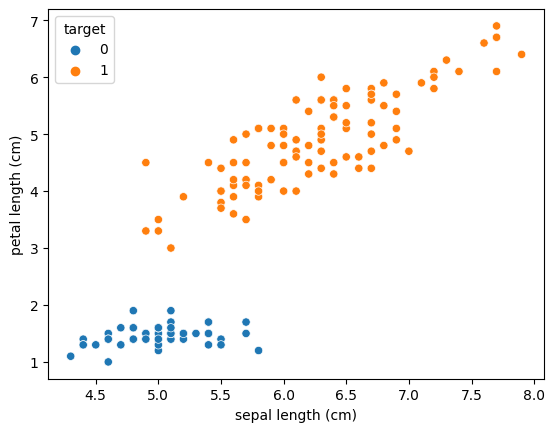

In [22]:
sns.scatterplot(data = df_iris, x = 'sepal length (cm)', y = 'petal length (cm)', hue = 'target');

### Meu perceptron na Iris

In [23]:
pesos = np.empty(3)
epocas, pesos, acertou_tudo = meu_neuronio(bias = 1, pesos = pesos, tx_aprendizado = .1, dataset = df_iris.values, epocas_max = 100)
print(epocas, pesos, acertou_tudo)

6 [-0.2  -0.34  0.91] sim


In [24]:
w0, w1, w2 = pesos[0], pesos[1], pesos[2]

intercept = -w0/w2
slope = -w1/w2

xs = np.arange(4, 9)
ys = slope*xs + intercept

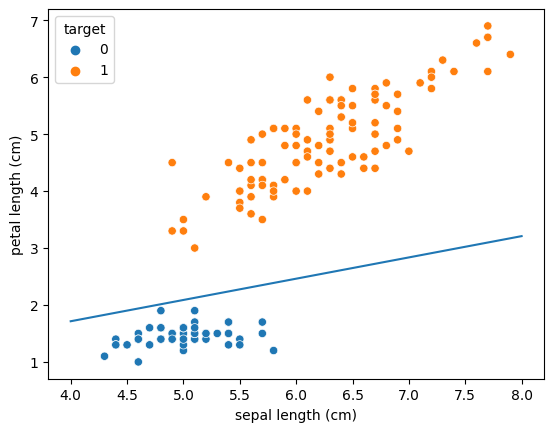

In [25]:
sns.scatterplot(data = df_iris, x = 'sepal length (cm)', y = 'petal length (cm)', hue = 'target')
plt.plot(xs, ys);

### Perceptron do Scikit-Learn na Iris

In [26]:
X = df_iris[['sepal length (cm)', 'petal length (cm)']]
y = df_iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7 ,random_state = 42)

In [27]:
model = Perceptron()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

1.0

In [28]:
w0 = model.intercept_[0]
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]

intercept = -w0/w2
slope = -w1/w2

xs = np.arange(4, 9)
ys = slope*xs + intercept

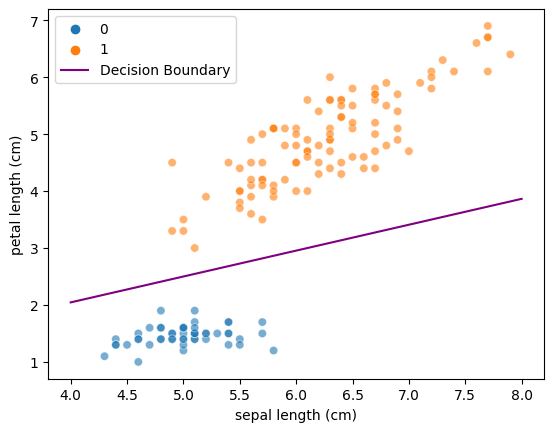

In [30]:
sns.scatterplot(data = df_iris, x = 'sepal length (cm)', y = 'petal length (cm)', hue = 'target', alpha = .6)

plt.plot(xs, ys, color = 'purple', label = 'Decision Boundary')
plt.legend()
plt.show()

### Diferentes Seeds

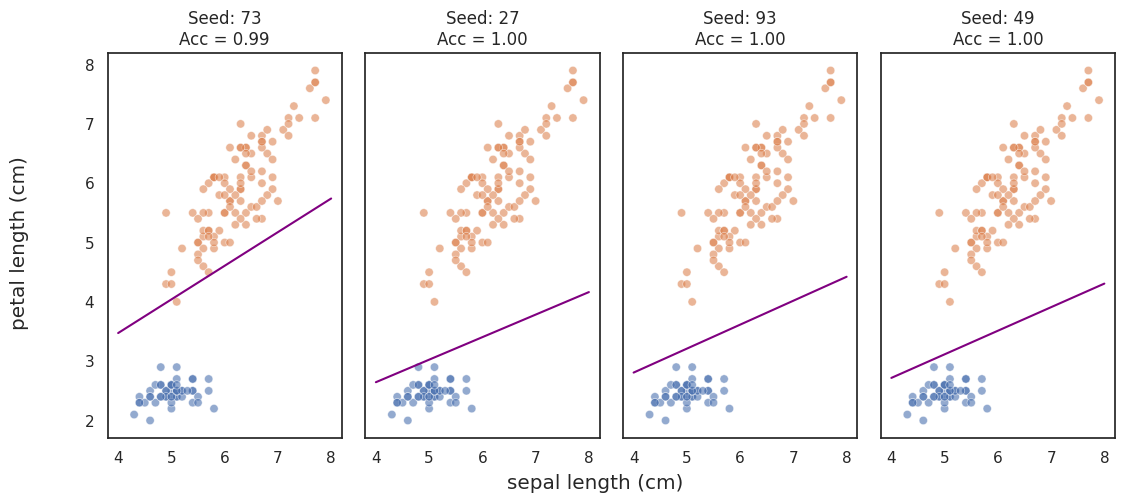

In [31]:
sns.set_theme(style = 'white')

def grafico(ax, acc, seed, xs, ys):

    sns.scatterplot(data = df_iris, x = 'sepal length (cm)', y = 'petal length (cm)', hue = 'target', alpha = .6, ax=ax, legend = False)
    ax.set_title(f'Seed: {seed}\nAcc = {acc:.2f}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7, 8]) if i == 0 else ax.set_yticklabels([])
    ax.plot(xs, ys, color = 'purple', label = 'Decision Boundary')    

def perceptron_seed(seed):
    
    # Separando em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7 ,random_state = seed)

    # Criando e treinando o modelo
    model = Perceptron()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)

    # Obtendo os pesos e bias
    w0 = model.intercept_[0]
    w1 = model.coef_[0][0]
    w2 = model.coef_[0][1]

    # Calculando o hiperplanopq
    b = -w0/w2
    m = -w1/w2
    xs = np.arange(4, 9)
    ys = m*xs + b

    return acc, xs, ys


# Plotando
fig, ax = plt.subplots(1, 4, figsize = (13, 5))
fig.subplots_adjust(wspace = 0.1)

seeds = np.random.randint(100, size = 4)

for i, seed in enumerate(seeds):
    acc, xs, ys = perceptron_seed(seed)
    grafico(ax.flatten()[i], acc, seed, xs, ys)

fig.supylabel('petal length (cm)', x = .05)
fig.supxlabel('sepal length (cm)', y = 0)

plt.show()

# e) Dataset Artificial

In [63]:
dataset = pd.read_csv('../datasets/artificial.csv')
dataset['D'] = dataset['D'].map({-1: 0, 1: 1})
dataset = dataset.drop(columns = ['Bias'])

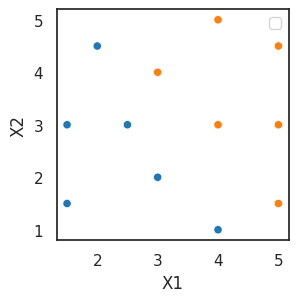

In [64]:
fig, ax = plt.subplots(figsize = (3, 3))
sns.scatterplot(data = dataset, x = 'X1', y = 'X2', hue = 'D', palette = 'tab10', ax = ax)
ax.legend('');

In [65]:
pesos = np.array([.5, .5, .5])
bias = 1
tx_aprendizado = .1
epocas_max = 100000

epocas, pesos, acertou_tudo = meu_neuronio(bias, pesos, tx_aprendizado, dataset = dataset.values)

print(50*'=')
print(f'Épocas: {epocas}')
print(f'Pesos: {pesos}')
print(f'Acertou tudo?: {acertou_tudo}')

Épocas: 27
Pesos: [-3.    0.65  0.3 ]
Acertou tudo?: sim


In [66]:
w0, w1, w2 = pesos[0], pesos[1], pesos[2]

intercept = -w0/w2
slope = -w1/w2

xs = np.arange(2, 6)
ys = slope*xs + intercept

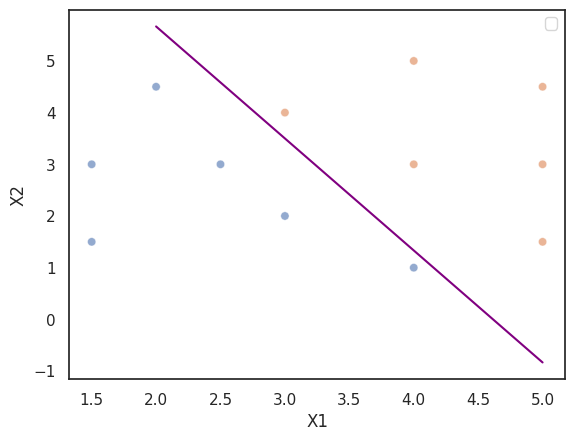

In [67]:
sns.scatterplot(data = dataset, x = 'X1', y = 'X2', hue = 'D', alpha = .6)

plt.plot(xs, ys, color = 'purple', label = 'Decision Boundary')
plt.legend('')
plt.show()